# Naive Bayes :
- N B algorithms is a suprervised learning algorithms , which  is based on Bayes Theorem , and used for solving classification problems .
" it is a probabilistics classifier , which means it prediict on the basis of the probability of a object
# Bayes Theorem:
which is used to determine the probability  of a hypothesis with prior knowledge.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[:,-1].values

In [4]:
X.shape

(400, 2)

In [5]:
y.shape

(400,)

In [6]:
from sklearn.model_selection import  train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

In [7]:
X_train.shape

(320, 2)

In [8]:
y_train.shape

(320,)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train , y_train)

GaussianNB()

In [12]:
print(classifier.predict(sc.transform([[30 , 85000]])))

[1]


In [13]:
y_pred = classifier.predict(X_test)

In [14]:
y_pred = y_pred.reshape(len(y_pred) , 1)
y_test = y_pred.reshape(len(y_test) , 1)

In [15]:
print(np.concatenate((y_pred , y_test) , axis = 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [16]:
from sklearn.metrics import confusion_matrix  , accuracy_score
cm = confusion_matrix(y_pred , y_test)
acc = accuracy_score(y_pred , y_test)
print(cm , acc)

[[59  0]
 [ 0 21]] 1.0


C:\Users\sana\AppData\Local\Temp\ipykernel_11032\1764185017.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set ==j , 0 ] , X_set[y_set ==j , 1] , c = ListedColormap(('red' , 'green')) (i), label = j)


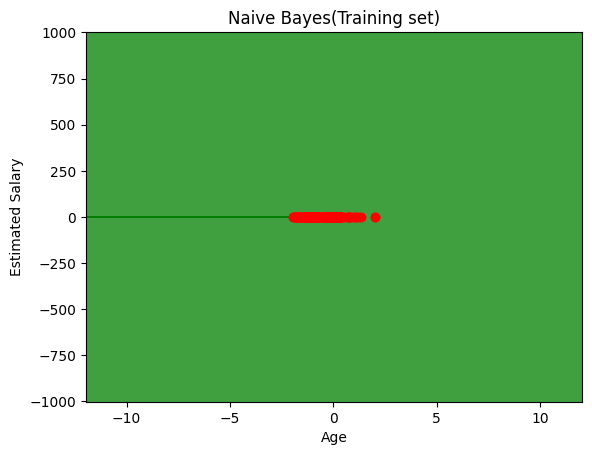

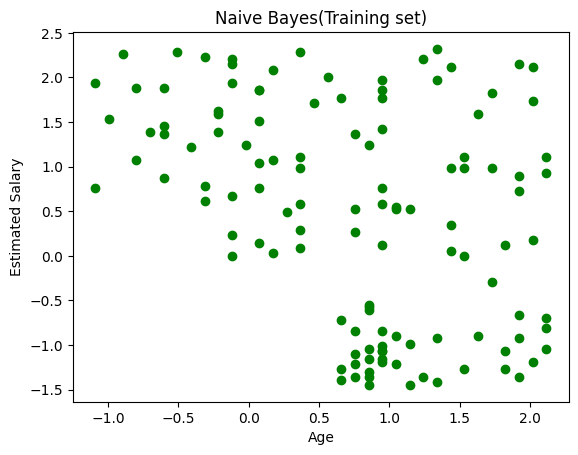

In [18]:
from matplotlib.colors import ListedColormap
X_set , y_set = sc.inverse_transform(X_train) , y_train 
x1 , x2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 10, stop = X_set[: , 0].max() + 10 , step = 1), 
                      np.arange(start = X_set[: , 0].min() - 1000, stop = X_set[: , 0].max() + 1000 , step = 1))

plt.contourf(x1 , x2 , classifier.predict(sc.transform(np.array([x1.ravel() , x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75 , cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min() , x1.max())
plt.ylim(x2.min() , x2.max())
for i , j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set ==j , 0 ] , X_set[y_set ==j , 1] , c = ListedColormap(('red' , 'green')) (i), label = j) 
      plt.title('Naive Bayes(Training set)')
      plt.xlabel('Age')
      plt.ylabel('Estimated Salary')
      plt.show()